In [ ]:
import pandas as pd

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/data_mining_project/preprocessed_data.csv')

In [ ]:
data=pd.read_csv('/content/diabetic_data (1).csv')

In [ ]:
data.head()

,age,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,glimepiride,pioglitazone,rosiglitazone,acarbose,change,diabetesMed,readmitted
0,0.000000,23,5,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,1,1,1,1,1,1,0,2
1,0.111111,15,1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333,1,1,1,1,1,0,1,1
2,0.222222,15,1,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.333333,1,1,1,1,1,1,1,2
3,0.333333,15,1,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000,1,1,1,1,1,0,1,2
4,0.444444,15,1,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667,1,1,1,1,1,0,1,2


In [ ]:


from sklearn.model_selection import train_test_split

X = data.drop('readmitted', axis=1)
y = data['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(
    n_estimators=150,  #from 100 to 150
    max_depth=40,  #30 gives 80.8 while 40 give 80.9
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt', #can do log2 but has no effect
    bootstrap=False,   #was true but False improved the accuracy
    class_weight='balanced', #default was None. Changed and it improved accuracy
    random_state=42
    #verbose=1,
    #n_jobs=2
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)



Accuracy: 0.8204380448980831


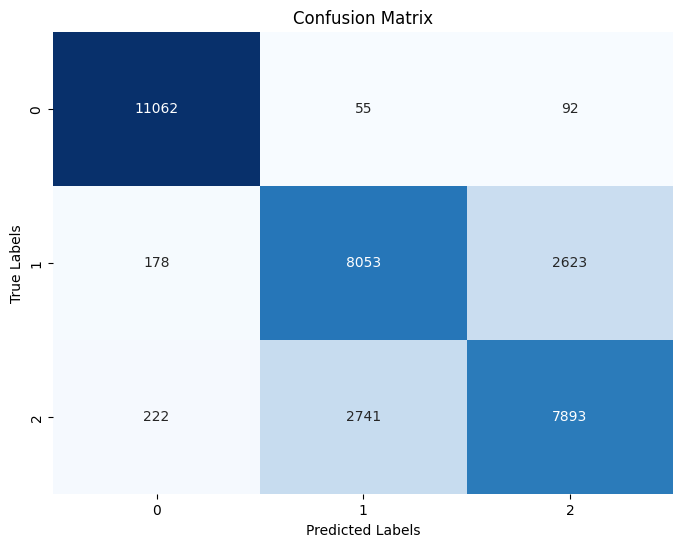

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


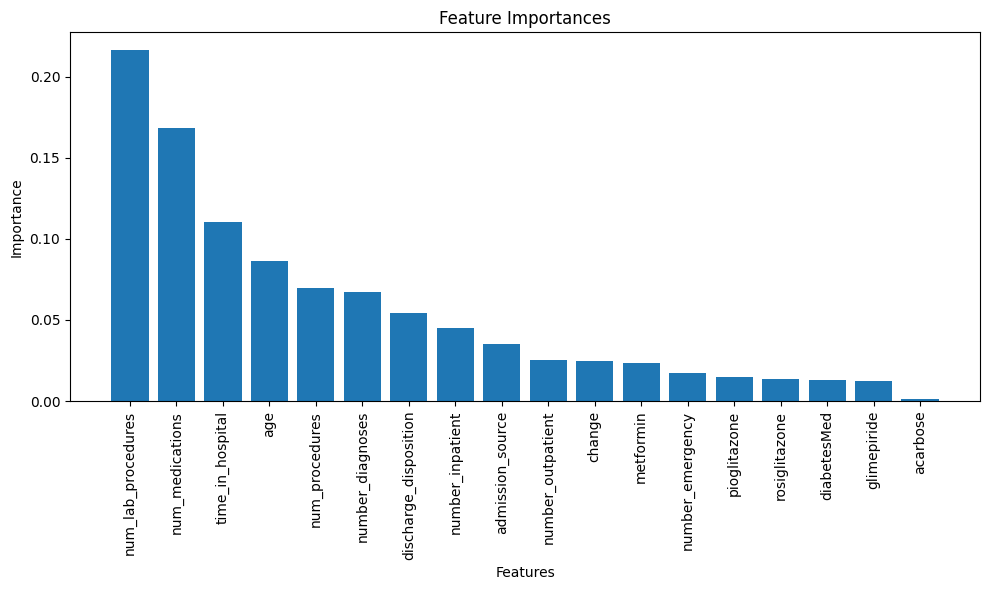

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained random forest model
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by their importance
sorted_indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


#Report precision, recall, sensitivity, specificity, etc in addition to accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Assuming y_test, y_pred_rf, rf_classifier, X_test, X_train, y_train are already defined

# Printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", conf_matrix)

# Sensitivity and specificity calculations (assuming binary or consider multi-class adjustments)
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1:].sum()
fp = conf_matrix[1:, 0].sum()
tn = conf_matrix[1:, 1:].sum()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     11209
           1       0.74      0.74      0.74     10854
           2       0.74      0.73      0.74     10856

    accuracy                           0.82     32919
   macro avg       0.82      0.82      0.82     32919
weighted avg       0.82      0.82      0.82     32919


Confusion Matrix:
 [[11062    55    92]
 [  178  8053  2623]
 [  222  2741  7893]]
Sensitivity (Recall): 0.99
Specificity: 0.98


ROC Curve

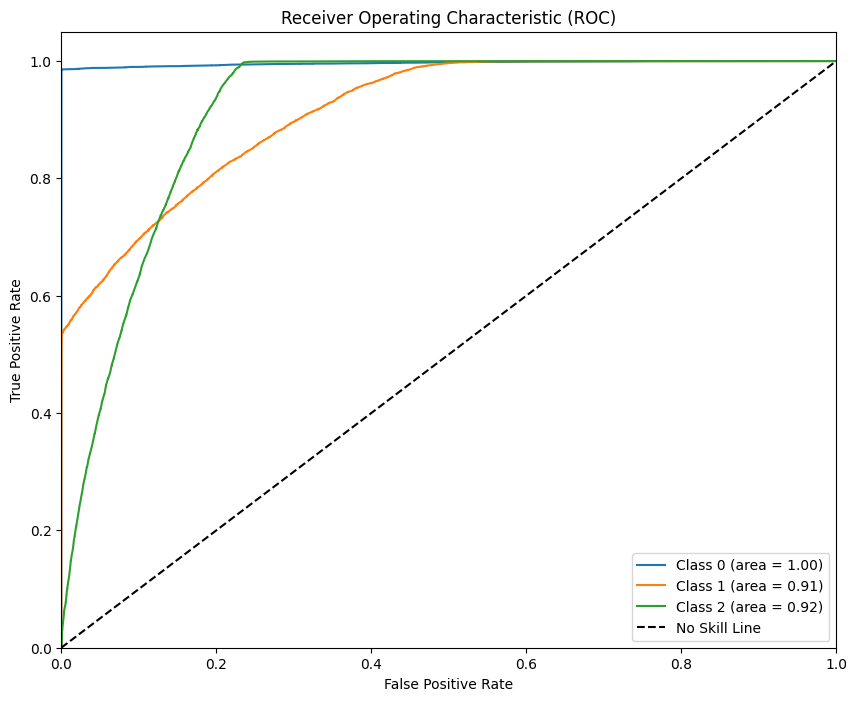

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Convert labels to a one-hot encoding format if you haven't already done so
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Fit OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)
ovr_classifier.fit(X_train, y_train_binarized)

# Predict probabilities
y_pred_proba = ovr_classifier.predict_proba(X_test)

# Calculate ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_pred_proba.shape[1]):  # Assuming number of classes from the shape of probabilities
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(roc_auc)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',  #changed from None to sqrt
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None
)


# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.7611409824113734


#Report precision, recall, sensitivity, specificity, etc in addition to accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:

# Printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate sensitivity and specificity from the confusion matrix
# Assuming the first class is the positive class
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1:]
fp = conf_matrix[1:, 0]
tn = conf_matrix[1:, 1:].sum()

sensitivity = tp / (tp + fn.sum())
specificity = tn / (tn + fp.sum())

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     11209
           1       0.69      0.72      0.71     10854
           2       0.73      0.56      0.64     10856

    accuracy                           0.76     32919
   macro avg       0.75      0.76      0.75     32919
weighted avg       0.75      0.76      0.75     32919


Confusion Matrix:
 [[11086    44    79]
 [  774  7838  2242]
 [ 1229  3495  6132]]
Sensitivity (Recall): 0.99
Specificity: 0.91


ROC Curve

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

Accuracy: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Report precision, recall, sensitivity, specificity, etc in addition to accuracy

In [ ]:

# Printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate sensitivity and specificity from the confusion matrix
# Assuming the first class is the positive class
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1:]
fp = conf_matrix[1:, 0]
tn = conf_matrix[1:, 1:].sum()

sensitivity = tp / (tp + fn.sum())
specificity = tn / (tn + fp.sum())

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.42      0.44     11209
           1       0.39      0.28      0.32     10854
           2       0.44      0.63      0.52     10856

    accuracy                           0.44     32919
   macro avg       0.44      0.44      0.43     32919
weighted avg       0.44      0.44      0.43     32919


Confusion Matrix:
 [[4683 2626 3900]
 [3225 2996 4633]
 [1971 2067 6818]]
Sensitivity (Recall): 0.42
Specificity: 0.76


##Linear Regression

#Report precision, recall, sensitivity, specificity, etc in addition to accuracy

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# Predict on the testing data
y_pred_linear = linear.predict(X_test)

# Define a threshold for classification
threshold = 0.5
y_pred_class = (y_pred_linear > threshold).astype(int)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy_linear:.2f}")

# Calculate precision, recall, and F1 score
# Since y_test is multiclass, we need to use a different average
precision = precision_score(y_test, y_pred_class, average='macro')
recall = recall_score(y_test, y_pred_class, average='macro')
f1 = f1_score(y_test, y_pred_class, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity and specificity from the confusion matrix
# Assuming the first class is the positive class
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1:]
fp = conf_matrix[1:, 0]
tn = conf_matrix[1:, 1:].sum()

sensitivity = tp / (tp + fn.sum())
specificity = tn / (tn + fp.sum())

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Accuracy: 0.34
Precision: 0.33
Recall: 0.34
F1 Score: 0.20
Confusion Matrix:
 [[  654 10555     0]
 [  261 10593     0]
 [   65 10791     0]]
Sensitivity (Recall): 0.06
Specificity: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameters for KNeighborsClassifier
knn_params = {
    'n_neighbors': 3,             # Default: 5
    'weights': 'distance',         # Default: 'uniform'
    'algorithm': 'auto',          # Default: 'auto'
    'leaf_size': 30,              # Default: 30
    'p': 2,                       # Default: 2 (Euclidean distance)
    'metric': 'minkowski',       # Default: 'minkowski'
    'n_jobs': None                # Default: None (no parallelism)
}

# Create KNeighborsClassifier
knn_classifier = KNeighborsClassifier(**knn_params)

knn_classifier.fit(X_train, y_train)
# Making predictions on the testing data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.7383881648895775


#Report precision, recall, sensitivity, specificity, etc in addition to accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate sensitivity and specificity from the confusion matrix
# Assuming the first class is the positive class
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1:]
fp = conf_matrix[1:, 0]
tn = conf_matrix[1:, 1:].sum()

sensitivity = tp / (tp + fn.sum())
specificity = tn / (tn + fp.sum())

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88     11209
           1       0.69      0.72      0.70     10854
           2       0.73      0.49      0.59     10856

    accuracy                           0.74     32919
   macro avg       0.73      0.74      0.72     32919
weighted avg       0.73      0.74      0.72     32919


Confusion Matrix:
 [[11083    50    76]
 [ 1056  7853  1945]
 [ 1961  3524  5371]]
Sensitivity (Recall): 0.99
Specificity: 0.86


##GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
naive_bayes = GaussianNB()

# Fitting the model to the training data
naive_bayes.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_nb = naive_bayes.predict(X_test)

# Evaluating the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.4044169020930162


# Report precision, recall, sensitivity, specificity, etc in addition to accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate sensitivity and specificity from the confusion matrix
# Assuming the first class is the positive class
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1:]
fp = conf_matrix[1:, 0]
tn = conf_matrix[1:, 1:].sum()

sensitivity = tp / (tp + fn.sum())
specificity = tn / (tn + fp.sum())

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.24      0.33     11209
           1       0.42      0.12      0.18     10854
           2       0.38      0.86      0.53     10856

    accuracy                           0.40     32919
   macro avg       0.44      0.41      0.35     32919
weighted avg       0.44      0.40      0.35     32919


Confusion Matrix:
 [[2668 1113 7428]
 [1725 1288 7841]
 [ 797  702 9357]]
Sensitivity (Recall): 0.24
Specificity: 0.88


##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
gbm = GradientBoostingClassifier(
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=400, #increased from 150 to 400
    subsample=1.0,
    criterion='friedman_mse',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    warm_start=False,
    random_state=None
)

# Fitting the model to the training data
gbm.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_gbm = gbm.predict(X_test)

# Evaluating the model
accuracy_gbm = accuracy_score(y_test,y_pred_gbm)
print("Accuracy:", accuracy_gbm)

Accuracy: 0.46666059114796926


#Report precision, recall, sensitivity, specificity, etc in addition to accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report



# Printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate sensitivity and specificity from the confusion matrix
# Assuming the first class is the positive class
tp = conf_matrix[0, 0]
fn = conf_matrix[0, 1:]
fp = conf_matrix[1:, 0]
tn = conf_matrix[1:, 1:].sum()

sensitivity = tp / (tp + fn.sum())
specificity = tn / (tn + fp.sum())

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.42      0.46     11209
           1       0.42      0.38      0.40     10854
           2       0.47      0.60      0.53     10856

    accuracy                           0.47     32919
   macro avg       0.47      0.47      0.46     32919
weighted avg       0.47      0.47      0.46     32919


Confusion Matrix:
 [[4690 3164 3355]
 [2829 4162 3863]
 [1757 2589 6510]]
Sensitivity (Recall): 0.42
Specificity: 0.79


##Ann

In [ ]:
!pip install tensorflow


In [ ]:
#ANN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'data_resampled' contains your DataFrame
# Splitting data into features (X) and target variable (y)

# Assuming X_train, X_test, y_train, and y_test are already defined

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the ANN model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Adding more hidden layers
model.add(Dense(units=64, activation='relu'))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy_ann = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy_ann)


Epoch 1/5
3292/3292 [==============================] - 15s 4ms/step - loss: -1483.9337 - accuracy: 0.3504 - val_loss: -5563.2700 - val_accuracy: 0.3471
Epoch 2/5
3292/3292 [==============================] - 18s 5ms/step - loss: -23316.6719 - accuracy: 0.3514 - val_loss: -45970.9297 - val_accuracy: 0.3490
Epoch 3/5
3292/3292 [==============================] - 18s 6ms/step - loss: -101566.0859 - accuracy: 0.3504 - val_loss: -157128.2344 - val_accuracy: 0.3507
Epoch 4/5
3292/3292 [==============================] - 9s 3ms/step - loss: -276775.5000 - accuracy: 0.3513 - val_loss: -374106.5938 - val_accuracy: 0.3478
Epoch 5/5
1029/1029 [==============================] - 2s 1ms/step - loss: -706440.7500 - accuracy: 0.3506
Accuracy: 0.350557416677475


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming model is already defined, compiled, and trained
# Example data generation and preprocessing not shown here

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extracting true positives, false negatives, false positives, and true negatives
tp = conf_matrix[0, 0]  # True positives
fn = conf_matrix[0, 1]  # False negatives
fp = conf_matrix[1, 0]  # False positives
tn = conf_matrix[1, 1]  # True negatives

# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)  # Also known as recall
specificity = tn / (tn + fp)
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")


1029/1029 [==============================] - 2s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.16      0.25     11209
           1       0.33      0.90      0.48     10854
           2       0.00      0.00      0.00     10856

    accuracy                           0.35     32919
   macro avg       0.29      0.35      0.24     32919
weighted avg       0.29      0.35      0.24     32919

Confusion Matrix:
 [[ 1804  9405     0]
 [ 1118  9736     0]
 [  379 10477     0]]
Sensitivity: 0.16
Specificity: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


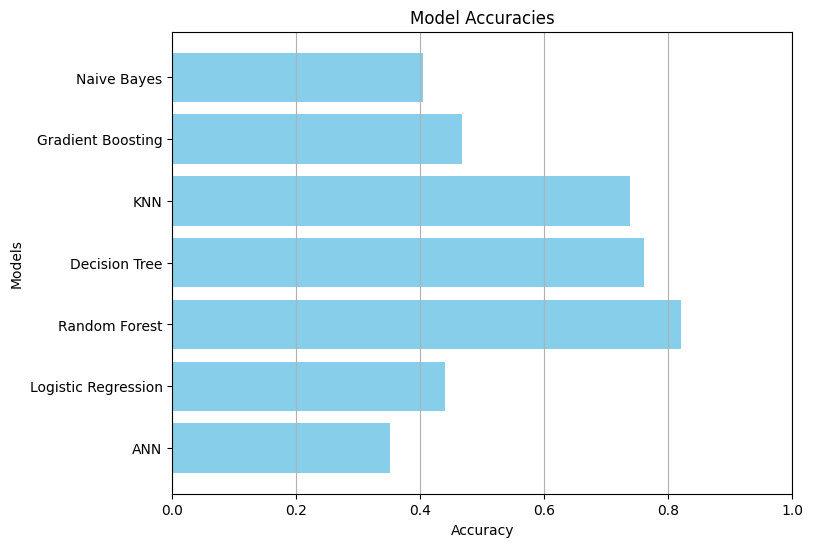

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['ANN', 'Logistic Regression', 'Random Forest', 'Decision Tree','KNN','Gradient Boosting','Naive Bayes']

# Model accuracies (replace these values with your actual accuracy values)
accuracies = [accuracy_ann, accuracy_lr,accuracy_rf,accuracy_dt,accuracy_knn,accuracy_gbm,accuracy_nb]

# Plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.barh(models, accuracies, color='skyblue')  # Horizontal bar chart
plt.xlabel('Accuracy')  # Label for x-axis
plt.ylabel('Models')    # Label for y-axis
plt.title('Model Accuracies')  # Title of the plot
plt.xlim(0, 1)  # Limit x-axis from 0 to 1 (assuming accuracy is a percentage)
plt.grid(axis='x')  # Add gridlines for x-axis
plt.show()  # Show plot
